In [157]:
import pandas as pd

train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

In [158]:
train.shape

(891, 12)

In [159]:
test.shape

(418, 11)

#### 각 dataset의 크기(행의 개수)

In [160]:
ntrain = train.shape[0]
ntest = test.shape[0]
print(ntrain, ntest)

891 418


#### dataset 하나로 합치기

In [161]:
df = pd.concat([train, test])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### Feature Engineering 1
- 범주형 데이터 수치형 데이터로 변환

#### Sex(성별) 숫자 변환

In [162]:
df["Sex"].isnull().sum()

np.int64(0)

In [163]:
df["Sex"].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

In [164]:
df["Sex"] = df["Sex"].map({"male":0, "female": 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


#### Embarked(탑승지) 숫자 변환

##### 결측치 확인
- 결측치 2개 존재

In [165]:
df["Embarked"].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [166]:
df["Embarked"].isnull().sum()

np.int64(2)

In [167]:
df.loc[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


##### 결측지 주변값 확인
- 모두 S인 것을 알 수 있음
- 따라서 해당 결측치도 S로 간주하는 것이 합리적

In [168]:
df.sort_values(["Ticket"], ascending=True)[55:80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",0,65.00,0,1,113509,61.9792,B30,C
351,352,0.0,1,"Williams-Lambert, Mr. Fletcher Fellows",0,NaN,0,0,113510,35.0000,C128,S
252,253,0.0,1,"Stead, Mr. William Thomas",0,62.00,0,0,113514,26.5500,C87,S
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.00,0,0,113572,80.0000,B28,NaN
61,62,1.0,1,"Icard, Miss. Amelie",1,38.00,0,0,113572,80.0000,B28,NaN
802,803,1.0,1,"Carter, Master. William Thornton II",0,11.00,1,2,113760,120.0000,B96 B98,S
390,391,1.0,1,"Carter, Mr. William Ernest",0,36.00,1,2,113760,120.0000,B96 B98,S
435,436,1.0,1,"Carter, Miss. Lucile Polk",1,14.00,1,2,113760,120.0000,B96 B98,S
763,764,1.0,1,"Carter, Mrs. William Ernest (Lucile Polk)",1,36.00,1,2,113760,120.0000,B96 B98,S
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",0,NaN,0,0,113767,50.0000,A32,S


##### 결측치 처리

In [169]:
df.loc[df["Embarked"].isnull(), "Embarked"] = "S"

In [170]:
df["Embarked"].isnull().sum()

np.int64(0)

#### Embarked 데이터 숫자 변환

In [171]:
df_tmp = df.copy()

In [172]:
df_tmp["Embarked"] = df_tmp["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [173]:
df_tmp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [174]:
df_tmp2 = df.copy()
df_tmp2["Embarked"] = pd.factorize(df_tmp2["Embarked"])[0]
df_tmp2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0


In [175]:
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


#### Name
- Mr, Mrs과 같이 성별 및 신분을 나타내는 문자열 추출 

In [176]:
df['Initial'] = df["Name"].str.extract(r"([A-Za-z]+)\.")

In [177]:
df["Initial"].value_counts()

Initial
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Mme           1
Don           1
Sir           1
Lady          1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

#### 귀족 여성을 나타내는 많은 값이 존재 → 도메인 지식의 중요성(해당 initial에 대해 사전 지식을 가지고 있으면 feature Engineering에 수월)
- **해당 명칭을 Lady로 통일**
- Ms : 귀족 미망인
- Mlle, Mme: 마드모아젤 또는 마담의 줄임말, 귀족 여성을 나타냄
- Countess: 백작 부인
- Lady: 귀족 여인

In [178]:
cond = (df["Initial"] == "Mme") | (df["Initial"] == "Mlle") | (df["Initial"] == "Ms") | (df["Initial"] == "Countess") |  (df["Initial"] == "Lady")
df.loc[cond, "Initial"] = "Lady"

In [179]:
df["Initial"].value_counts()

Initial
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Lady          7
Col           4
Major         2
Don           1
Sir           1
Capt          1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [180]:
mapping = {"Mr":0, "Miss": 1, "Mrs": 2, "Master": 3, "Lady": 4, "Don": 5, "Rev": 6, "Dr": 7, "Major": 8, "Sir": 9, "Col": 10, "Capt": 11, "Jonkheer": 12}
df["Initial"] = df["Initial"].map(mapping)


In [181]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0,0.0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1,NaN
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0.0
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0,0.0


In [182]:
df.drop(["Name"], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1.0,1,1,35.0,1,0,113803,53.1000,C123,0,2.0
4,5,0.0,3,0,35.0,0,0,373450,8.0500,NaN,0,0.0


#### Age

#### 결측치가 상당히 많은 것을 확인 가능

In [183]:
df["Age"].isnull().sum()

np.int64(263)

In [184]:
df["Age"].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

#### initial에 따른 평균 나이대 확인해보기
- master의 나이대가 상당히 어린 것을 알 수 있음
- initial 별로 나이를 구하여 결측치에 집어넣음

In [185]:
df.groupby("Initial").agg({'Age': ["mean", "median", "count"]})

Age             
              mean median count
Initial                        
0.0      32.252151   29.0   581
1.0      21.774238   22.0   210
2.0      36.994118   35.5   170
3.0       5.482642    4.0    53
4.0      30.166667   26.0     6
5.0      40.000000   40.0     1
6.0      41.250000   41.5     8
7.0      43.571429   49.0     7
8.0      48.500000   48.5     2
9.0      49.000000   49.0     1
10.0     54.000000   54.5     4
11.0     70.000000   70.0     1
12.0     38.000000   38.0     1

In [186]:
df["Age"].fillna(df.groupby("Initial")["Age"].transform("median"), inplace=True)

C:\Users\rladm\AppData\Local\Temp\ipykernel_15380\2495128880.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [187]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1.0,1,1,35.0,1,0,113803,53.1000,C123,0,2.0
4,5,0.0,3,0,35.0,0,0,373450,8.0500,NaN,0,0.0


In [188]:
df["Age"].isnull().sum()

np.int64(0)

#### 그래프로 확인
- 20세 이하일 경우 생존률이 높음
- 중간층의 사망률이 높음

In [189]:
import plotly.express as px

train = df[:ntrain]
fig = px.violin(train, y="Age", color="Survived", violinmode="overlay")
fig.show()

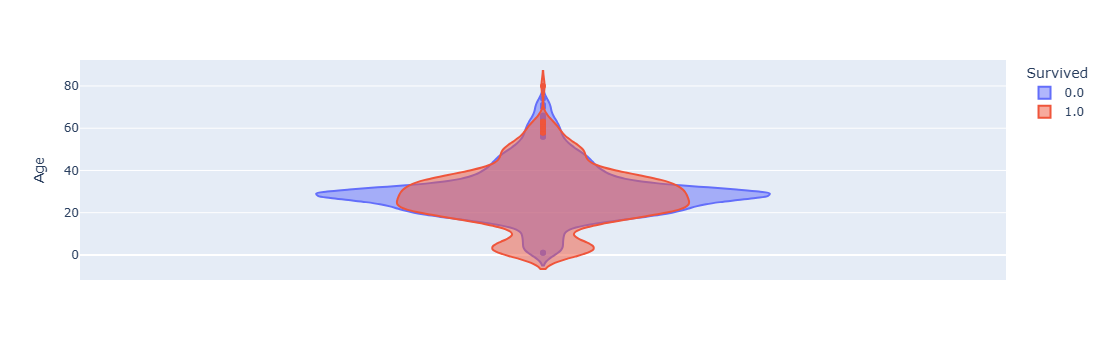

#### 수치형인 Age 데이터를 범위로 나눠 범주화시킴
- 영유아 : 2살 이하  = 0 
- 어린이 : 15살 이하  = 1
- 청소년 : 20살 이하 = 2
- 청년층 : 33살 이하 = 3
- 중년층: 43살 이하 = 4
- 장년층 : 60살 이하 = 5
- 노년층 : 75살 이하 = 6
- 고령층 : 75살 이상 = 7

In [190]:
df.loc[(df["Age"] <=2), "Age"] = 0
df.loc[(df["Age"] > 2 ) & (df["Age"] <= 15), "Age"] = 1
df.loc[(df["Age"] > 15 ) & (df["Age"] <= 20), "Age"] = 2
df.loc[(df["Age"] > 20 ) & (df["Age"] <= 33), "Age"] = 3
df.loc[(df["Age"] > 33 ) & (df["Age"] <= 43), "Age"] = 4
df.loc[(df["Age"] > 43 ) & (df["Age"] <= 60), "Age"] = 5
df.loc[(df["Age"] > 60 ) & (df["Age"] <= 75), "Age"] = 6
df.loc[(df["Age"] >= 75), "Age"] = 7

#### Fare 


In [191]:
train_fare = train.copy()
max_fare = train_fare["Fare"].max()
max_fare

512.3292

#### 히스토그램 확인 
- 적은 운임비에 있는 승객의 사망률이 높음을 확인

In [192]:
import plotly.express as px

train_fare["Outcome"] = train_fare["Survived"].map({0: "Dead", 1: "Survived"})

fig = px.histogram(
    train_fare,
    x="Fare",
    color="Outcome",
    range_x=[0, 520],
    barmode="overlay",
    title="Fare Distribution by Survival Status (Overlay, 20-unit-bins)"
)

fig.update_traces(
    xbins=dict(start=0, end=520, size=20)
)

fig.update_layout(
    xaxis=dict(
        tickmode="array",
        tickvals = [i for i in range(0, 521, 20)]
    )
)

fig.show()


#### Fare 결측치 확인

In [193]:
df["Fare"].isnull().sum()

np.int64(1)

In [194]:
df.loc[df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
152,1044,NaN,3,0,6.0,0,0,3701,NaN,NaN,0,0.0


#### Fare은 객석의 등급에 따라 달라질 가능성이 크므로 결측치를 해당 등급의 중앙값으로 치환

In [195]:
df["Fare"] = df["Fare"].fillna(df.groupby(["Pclass"])["Fare"].transform("median"))

#### 

#### Fare 수치 데이터 범주화

In [196]:
df.loc[(df["Fare"] <= 20), "Fare"] = 0
df.loc[(df["Fare"] > 20) & (df["Fare"] <= 40), "Fare"] = 1
df.loc[(df["Fare"] > 40) & (df["Fare"] <= 60), "Fare"] = 2
df.loc[(df["Fare"] > 60) & (df["Fare"] <= 80), "Fare"] = 3
df.loc[(df["Fare"] > 80) & (df["Fare"] <= 100), "Fare"] = 4
df.loc[(df["Fare"] > 100), "Fare"] = 5

In [197]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,0,3.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1.0,1,1,4.0,1,0,PC 17599,3.0,C85,1,2.0
2,3,1.0,3,1,3.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1.0,1,1,4.0,1,0,113803,2.0,C123,0,2.0
4,5,0.0,3,0,4.0,0,0,373450,0.0,NaN,0,0.0


#### SibSp + Parch
- 가족과 관련있는 두 Feature를 하나로 합쳐서 데이터의 크기 및 다양성을 보충 

In [198]:
df["Family"] = df["SibSp"] + df["Parch"] + 1 # 본인을 포함해야 하므로 1을 더함 


In [199]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Family
0,1,0.0,3,0,3.0,1,0,A/5 21171,0.0,NaN,0,0.0,2
1,2,1.0,1,1,4.0,1,0,PC 17599,3.0,C85,1,2.0,2
2,3,1.0,3,1,3.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0,1
3,4,1.0,1,1,4.0,1,0,113803,2.0,C123,0,2.0,2
4,5,0.0,3,0,4.0,0,0,373450,0.0,NaN,0,0.0,1


#### 기존 SibSp, Parch columns 삭제

In [200]:
df.drop(["SibSp", "Parch"], axis =1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family
0,1,0.0,3,0,3.0,A/5 21171,0.0,NaN,0,0.0,2
1,2,1.0,1,1,4.0,PC 17599,3.0,C85,1,2.0,2
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,NaN,0,1.0,1
3,4,1.0,1,1,4.0,113803,2.0,C123,0,2.0,2
4,5,0.0,3,0,4.0,373450,0.0,NaN,0,0.0,1


#### 결측치 확인을 위한 missingno library 사용


In [201]:
!pip install missingno

#### df 데이터 프레임의 특징
- train, test dataset을 합쳤기 때문에 Survived(Target)값이 없는 경우는 test dataset이라 볼 수 있음
- Cabin의 경우 상당히 많은 수의 결측치를 확인, 나머지 feature 들은 위의 engineering 과정을 통해 결측치 치환

<Axes: >

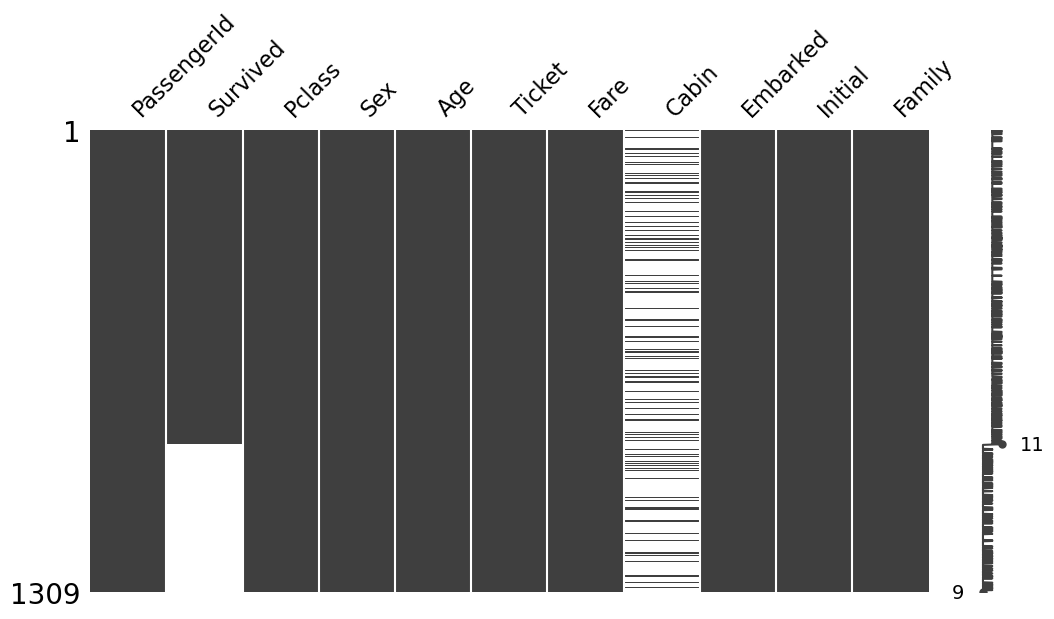

In [202]:
import missingno
missingno.matrix(df, figsize=(12, 6))


#### Cabin의 고유값 확인

In [203]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

#### Cabin의 결측치의 경우 U로 채워넣고, 첫번째 문자열만 가져옴


In [204]:
df["Cabin"] = df["Cabin"].fillna("U")
df["Cabin"] = df["Cabin"].str[0]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family
0,1,0.0,3,0,3.0,A/5 21171,0.0,U,0,0.0,2
1,2,1.0,1,1,4.0,PC 17599,3.0,C,1,2.0,2
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,U,0,1.0,1
3,4,1.0,1,1,4.0,113803,2.0,C,0,2.0,2
4,5,0.0,3,0,4.0,373450,0.0,U,0,0.0,1


In [205]:
df["Cabin"].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

#### Cabin 값에 따른 생존률 확인
- 대체로 Cabin 값이 없는 경우("U")에 사망률이 높음

In [206]:
train = df[:ntrain]
train.shape

(891, 11)

In [207]:
import plotly.express as px

train_cabin = train.copy()
train_cabin["Result"] = train_cabin["Survived"].map({0: "Dead", 1: "Survived" })


fig = px.histogram(
    train_cabin, 
    x="Cabin",
    color="Result",
    barmode="overlay",
    title="Cabin Distribution by Survival Status"
)
fig.show()

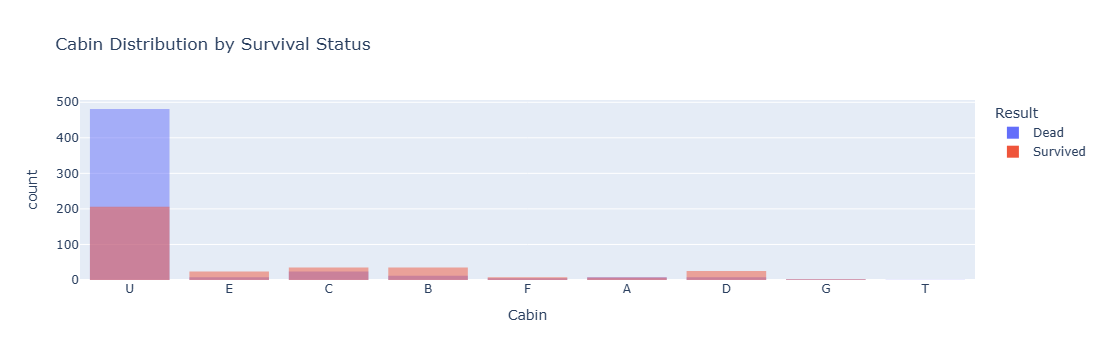

#### Cabin 값 범주화 (factorize())

In [208]:
df["Cabin"] = df["Cabin"].factorize()[0]

In [209]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,0,0.0,2
1,2,1.0,1,1,4.0,PC 17599,3.0,1,1,2.0,2
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,0,1.0,1
3,4,1.0,1,1,4.0,113803,2.0,1,0,2.0,2
4,5,0.0,3,0,4.0,373450,0.0,0,0,0.0,1


#### Ticket
- 해당 feature의 경우 패턴이 다양함
- 따라서 정규식을 통해 추출하는 방향성을 가짐

In [210]:
df["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

#### Ticket에서 Initial을 추출하는 과정

In [211]:
df["Ticket_Initial"] = df["Ticket"].str.extract('([^ \t\n\r\f\v]+)' )
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,0,0.0,2,A/5
1,2,1.0,1,1,4.0,PC 17599,3.0,1,1,2.0,2,PC
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,0,1.0,1,STON/O2.
3,4,1.0,1,1,4.0,113803,2.0,1,0,2.0,2,113803
4,5,0.0,3,0,4.0,373450,0.0,0,0,0.0,1,373450


In [212]:
df.loc[df["Ticket_Initial"] == "LINE", "Ticket_Initial"] = 0
df["Ticket_Initial2"] = df["Ticket_Initial"].str.replace(pat="[^A-Za-z]", repl="", regex=True).str[0:2]

In [213]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Initial2
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,0,0.0,2,A/5,A
1,2,1.0,1,1,4.0,PC 17599,3.0,1,1,2.0,2,PC,PC
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,0,1.0,1,STON/O2.,ST
3,4,1.0,1,1,4.0,113803,2.0,1,0,2.0,2,113803,
4,5,0.0,3,0,4.0,373450,0.0,0,0,0.0,1,373450,


In [214]:
df["Ticket_Initial2"] = df["Ticket_Initial2"].replace("", "UN")
train = df[:ntrain]


In [215]:
train

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Initial2
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,0,0.0,2,A/5,A
1,2,1.0,1,1,4.0,PC 17599,3.0,1,1,2.0,2,PC,PC
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,0,1.0,1,STON/O2.,ST
3,4,1.0,1,1,4.0,113803,2.0,1,0,2.0,2,113803,UN
4,5,0.0,3,0,4.0,373450,0.0,0,0,0.0,1,373450,UN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,0,3.0,211536,0.0,0,0,6.0,1,211536,UN
887,888,1.0,1,1,2.0,112053,1.0,6,0,1.0,1,112053,UN
888,889,0.0,3,1,3.0,W./C. 6607,1.0,0,0,1.0,4,W./C.,WC
889,890,1.0,1,0,3.0,111369,1.0,1,1,0.0,1,111369,UN


#### Ticket Initial 추출값을 기준으로 Survived 시각화
- Initial이 없는 경우가 사망률이 높음
- PC의 경우 생존률이 높음

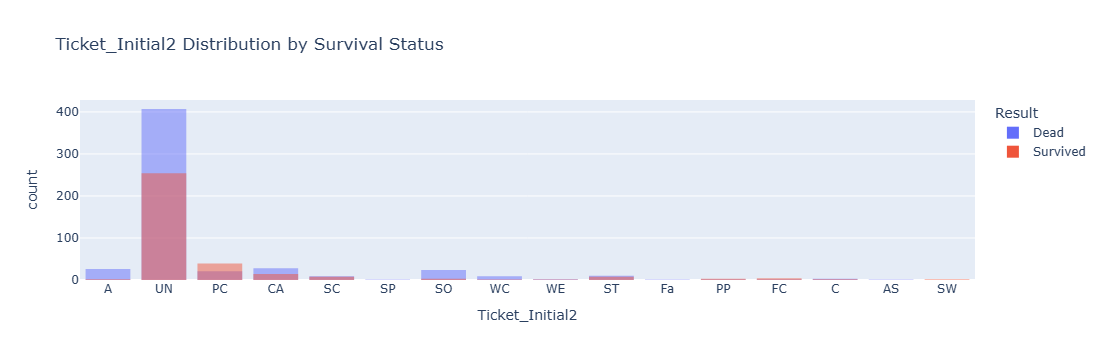

In [216]:
import plotly.express as px

train_ticket = train.copy()
train_ticket["Result"] = train_ticket["Survived"].map({0: "Dead", 1: "Survived" })


fig = px.histogram(
    train_ticket, 
    x="Ticket_Initial2",
    color="Result",
    barmode="overlay",
    title="Ticket_Initial2 Distribution by Survival Status"
)
fig.show()

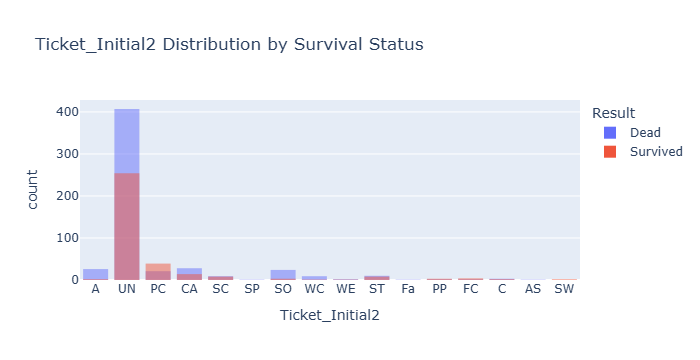

In [221]:
df["Ticket_Initial2"] = df["Ticket_Initial2"].factorize()[0]

In [222]:
df["Ticket_Num"]  =  df["Ticket"].str.extract('(\d+)$')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Initial2,Ticket_Num,Ticket_Num_Cut
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,0,0.0,2,A/5,0,21171,3.0
1,2,1.0,1,1,4.0,PC 17599,3.0,1,1,2.0,2,PC,1,17599,3.0
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,0,1.0,1,STON/O2.,2,3101282,9.0
3,4,1.0,1,1,4.0,113803,2.0,1,0,2.0,2,113803,3,113803,5.0
4,5,0.0,3,0,4.0,373450,0.0,0,0,0.0,1,373450,3,373450,9.0


In [223]:
df.Ticket_Num.describe()

count     1305
unique     923
top       2343
freq        11
Name: Ticket_Num, dtype: object

In [224]:
df["Ticket_Num_Cut"] = df["Ticket_Num"].astype('float')
df["Ticket_Num_Cut"] = pd.qcut(df["Ticket_Num_Cut"], q=10, labels=False)

In [225]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Initial2,Ticket_Num,Ticket_Num_Cut
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,0,0.0,2,A/5,0,21171,3.0
1,2,1.0,1,1,4.0,PC 17599,3.0,1,1,2.0,2,PC,1,17599,3.0
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,0,1.0,1,STON/O2.,2,3101282,9.0
3,4,1.0,1,1,4.0,113803,2.0,1,0,2.0,2,113803,3,113803,5.0
4,5,0.0,3,0,4.0,373450,0.0,0,0,0.0,1,373450,3,373450,9.0


In [226]:
train = df[:ntrain]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Initial2,Ticket_Num,Ticket_Num_Cut
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,0,0.0,2,A/5,0,21171,3.0
1,2,1.0,1,1,4.0,PC 17599,3.0,1,1,2.0,2,PC,1,17599,3.0
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,0,1.0,1,STON/O2.,2,3101282,9.0
3,4,1.0,1,1,4.0,113803,2.0,1,0,2.0,2,113803,3,113803,5.0
4,5,0.0,3,0,4.0,373450,0.0,0,0,0.0,1,373450,3,373450,9.0


#### Ticket Num Cut 시각화
- 티켓 숫자 범위 2 ~ 3 사이에서 생존률이 높음 

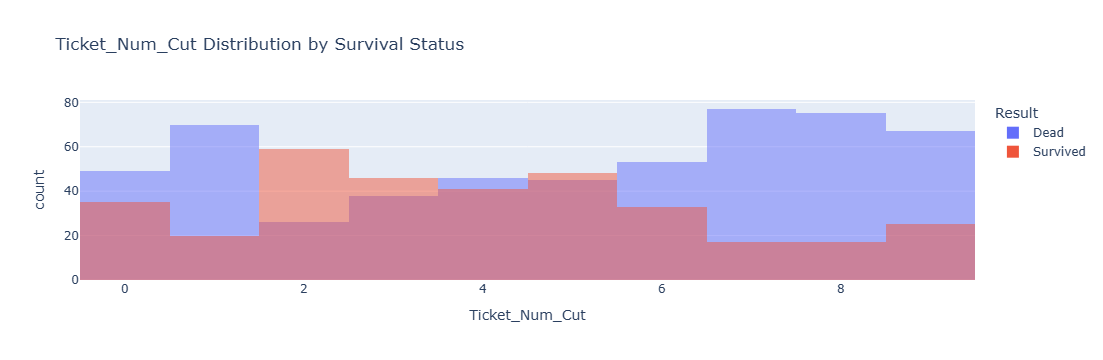

In [227]:
import plotly.express as px

train_ticket_num = train.copy()
train_ticket_num["Result"] = train_ticket_num["Survived"].map({0: "Dead", 1: "Survived" })


fig = px.histogram(
    train_ticket_num, 
    x="Ticket_Num_Cut",
    color="Result",
    barmode="overlay",
    title="Ticket_Num_Cut Distribution by Survival Status"
)
fig.show()

#### 티켓 관련 불필요한 Feature 삭제 

In [228]:
df.drop(['Ticket_Initial', 'Ticket_Num'], axis=1, inplace=True)

In [229]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial2,Ticket_Num_Cut
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,0,0.0,2,0,3.0
1,2,1.0,1,1,4.0,PC 17599,3.0,1,1,2.0,2,1,3.0
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,0,1.0,1,2,9.0
3,4,1.0,1,1,4.0,113803,2.0,1,0,2.0,2,3,5.0
4,5,0.0,3,0,4.0,373450,0.0,0,0,0.0,1,3,9.0


#### pickle
- 데이터 구조, 객체에 상관없이 파일 저장 및 읽기 가능


In [230]:
import pickle

In [231]:
with open('titanic_step1_feature_engineering.pickle', 'wb') as pickle_name:
    pickle.dump(df, pickle_name)